<a href="https://colab.research.google.com/github/youmnaayman21/sprint/blob/main/project_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Handle missing values
# 'ca' and 'thal' have missing values as per the variable information
for col in ['ca', 'thal']:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Check for missing values after filling
print("Missing values after filling:")
print(X.isnull().sum())

# Separate features by type for preprocessing
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert the processed data back to a DataFrame (optional, but helpful for inspection)
# Get the feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
processed_feature_names = numerical_features + list(onehot_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

display(X_processed_df.head())

Missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


/tmp/ipython-input-3961863783.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-3961863783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)


,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


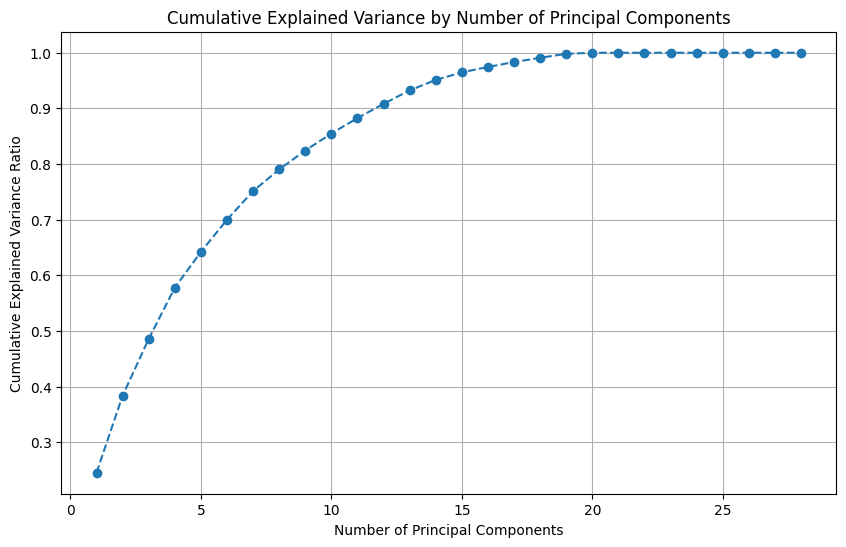

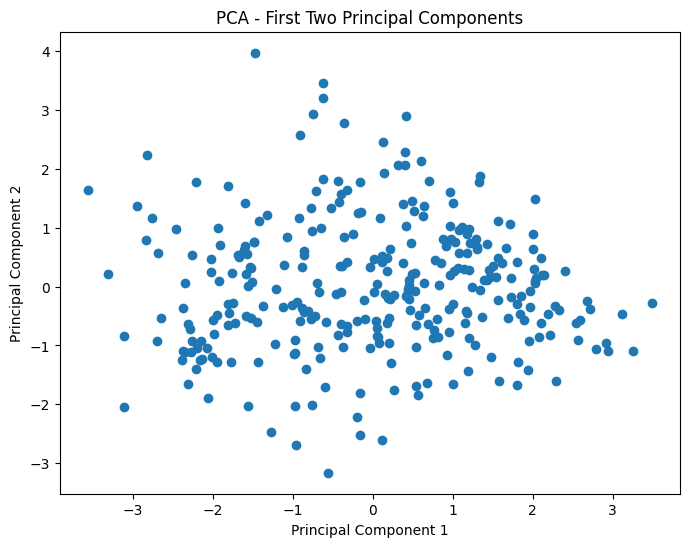

Number of components to retain 95% variance: 14


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.106907,0.374116,1.260066,0.223313,0.619085,0.745836,0.704861,-0.615556,-0.408859,-0.131596,0.990891,0.615419,-0.513332,0.377827
1,-2.837372,0.796843,-0.078904,0.578540,-0.642739,-0.816707,0.464507,0.030106,-0.455275,-0.201544,0.192747,-0.798094,-0.514747,-0.416678
2,-2.347468,-1.105240,-0.474015,0.016999,0.107207,0.998958,0.523494,0.599321,0.354261,-0.225500,0.253931,0.006374,0.161179,0.036213
3,1.149913,-0.625700,1.544589,-2.353078,1.721270,0.270248,-0.438689,-0.391358,-0.574206,0.355260,0.132987,-0.524265,-0.108606,-0.340271
4,1.731791,-0.169111,0.884868,-0.564106,0.817340,-0.590167,0.938080,0.521827,-0.330194,-0.174764,-0.486549,0.301347,0.094750,0.907522


In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_processed_df)

# Determine the optimal number of principal components using the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualize cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Scatter plot of the first two principal components (if applicable and interpretable)
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.title('PCA - First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# You can choose the number of components based on the cumulative variance plot, e.g., to retain 95% variance
# For example, to select components that explain 95% of the variance:
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_processed_df)

# The PCA-transformed dataset is X_pca_final
display(pd.DataFrame(X_pca_final).head())

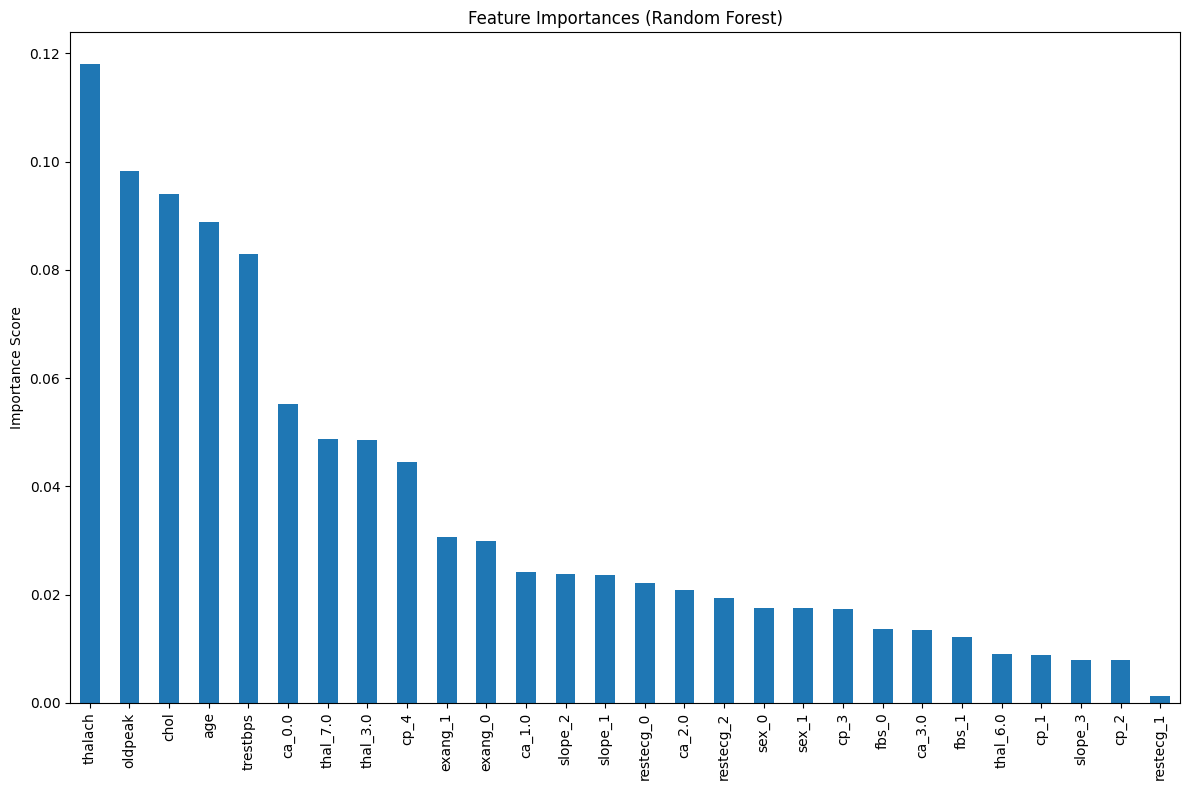


Features selected by RFE:
Index(['oldpeak', 'sex_1', 'cp_1', 'cp_4', 'fbs_1', 'restecg_0', 'exang_1',
       'slope_1', 'ca_0.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

Chi-Square Test Results (for one-hot encoded categorical features):
           Chi2 Stat       P-value
thal_7.0   46.721875  1.742480e-09
cp_4       45.129615  3.736737e-09
exang_1    41.534482  2.083076e-08
thal_3.0   39.343661  5.915773e-08
ca_2.0     34.648382  5.485601e-07
ca_0.0     31.906721  1.998938e-06
ca_3.0     29.999871  4.894734e-06
slope_1    28.232230  1.119153e-05
slope_2    22.408432  1.661808e-04
cp_3       21.974965  2.027333e-04
exang_0    20.156440  4.651089e-04
cp_2       16.942450  1.983352e-03
sex_0      15.926185  3.119829e-03
ca_1.0     15.262296  4.187001e-03
thal_6.0   10.943440  2.720708e-02
restecg_0   7.720681  1.023628e-01
sex_1       7.499223  1.117436e-01
fbs_1       6.658223  1.550901e-01
restecg_1   6.557266  1.612178e-01
restecg_2   6.

,thal_7.0,thal_6.0,thalach,restecg_0,slope_1,exang_0,cp_2,exang_1,chol,age,...,slope_2,cp_4,ca_2.0,ca_3.0,sex_1,oldpeak,trestbps,ca_1.0,ca_0.0,cp_3
0,0.0,1.0,0.017197,0.0,0.0,1.0,0.0,0.0,-0.264900,0.948726,...,0.0,0.0,0.0,0.0,1.0,1.087338,0.757525,0.0,1.0,0.0
1,0.0,0.0,-1.821905,0.0,0.0,0.0,0.0,1.0,0.760415,1.392002,...,1.0,1.0,0.0,1.0,1.0,0.397182,1.611220,0.0,0.0,0.0
2,1.0,0.0,-0.902354,0.0,0.0,0.0,0.0,1.0,-0.342283,1.392002,...,1.0,1.0,1.0,0.0,1.0,1.346147,-0.665300,0.0,0.0,0.0
3,0.0,0.0,1.637359,1.0,0.0,1.0,0.0,0.0,0.063974,-1.932564,...,0.0,0.0,0.0,0.0,1.0,2.122573,-0.096170,0.0,1.0,1.0
4,0.0,0.0,0.980537,0.0,1.0,1.0,1.0,0.0,-0.825922,-1.489288,...,0.0,0.0,0.0,0.0,0.0,0.310912,-0.096170,0.0,1.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest

# Feature Importance using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_processed_df, y.values.ravel()) # Flatten y
feature_importances = pd.Series(model.feature_importances_, index=X_processed_df.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# RFE with Logistic Regression
# Using Logistic Regression as the estimator for RFE
estimator = LogisticRegression(max_iter=1000)
# Select the top half of the features
rfe = RFE(estimator=estimator, n_features_to_select=len(X_processed_df.columns) // 2, step=1)
rfe.fit(X_processed_df, y.values.ravel())

# Get the selected features from RFE
rfe_features = X_processed_df.columns[rfe.support_]
print("\nFeatures selected by RFE:")
print(rfe_features)

X_categorical_processed = X_processed_df[onehot_feature_names]

# Apply Chi-Square Test
chi2_stats, p_values = chi2(X_categorical_processed, y.values.ravel())
chi2_results = pd.DataFrame({'Chi2 Stat': chi2_stats, 'P-value': p_values}, index=X_categorical_processed.columns)
chi2_results = chi2_results.sort_values(by='P-value')

print("\nChi-Square Test Results (for one-hot encoded categorical features):")
print(chi2_results)

# Select features based on a combination of methods (e.g., top features from importance and RFE, and significant chi-square features)
# For example, let's select features with importance > mean importance, RFE selected features, and chi-square features with p-value < 0.05

important_features = feature_importances[feature_importances > feature_importances.mean()].index.tolist()
significant_chi2_features = chi2_results[chi2_results['P-value'] < 0.05].index.tolist()

# Combine the selected features, remove duplicates
selected_features = list(set(important_features + list(rfe_features) + significant_chi2_features))

print("\nSelected features for modeling:")
print(selected_features)

# Create a new DataFrame with only the selected features
X_selected = X_processed_df[selected_features]

display(X_selected.head())

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y.values.ravel(), test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
# Specify 'average' for multiclass metrics
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_lr, average='weighted'))




Logistic Regression Evaluation:
Accuracy: 0.45901639344262296
Precision: 0.4331646143385963
Recall: 0.45901639344262296
F1-score: 0.4442140790742527


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))

Decision Tree Evaluation:
Accuracy: 0.4918032786885246
Precision: 0.4972216308281882
Recall: 0.4918032786885246
F1-score: 0.49232445246250245


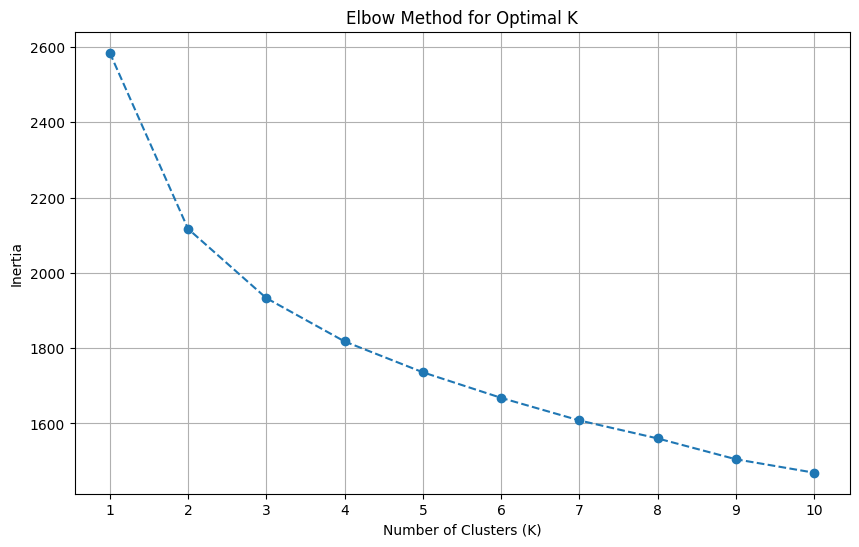

,thal_7.0,thal_6.0,thalach,restecg_0,slope_1,exang_0,cp_2,exang_1,chol,age,...,ca_2.0,ca_3.0,sex_1,oldpeak,trestbps,ca_1.0,ca_0.0,cp_3,KMeans_Cluster,Actual_Label
0,0.0,1.0,0.017197,0.0,0.0,1.0,0.0,0.0,-0.264900,0.948726,...,0.0,0.0,1.0,1.087338,0.757525,0.0,1.0,0.0,0,0
1,0.0,0.0,-1.821905,0.0,0.0,0.0,0.0,1.0,0.760415,1.392002,...,0.0,1.0,1.0,0.397182,1.611220,0.0,0.0,0.0,0,2
2,1.0,0.0,-0.902354,0.0,0.0,0.0,0.0,1.0,-0.342283,1.392002,...,1.0,0.0,1.0,1.346147,-0.665300,0.0,0.0,0.0,0,1
3,0.0,0.0,1.637359,1.0,0.0,1.0,0.0,0.0,0.063974,-1.932564,...,0.0,0.0,1.0,2.122573,-0.096170,0.0,1.0,1.0,2,0
4,0.0,0.0,0.980537,0.0,1.0,1.0,1.0,0.0,-0.825922,-1.489288,...,0.0,0.0,0.0,0.310912,-0.096170,0.0,1.0,0.0,2,0


In [ ]:
# Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
# Testing a range of possible number of clusters (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

optimal_k = 3 # Example choice based on expectation, adjust after viewing the plot

# Apply K-Means with the chosen K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
kmeans_clusters = kmeans_final.fit_predict(X_selected)

# Add the cluster labels to the selected features DataFrame for comparison
X_selected_clustered_kmeans = X_selected.copy()
X_selected_clustered_kmeans['KMeans_Cluster'] = kmeans_clusters
X_selected_clustered_kmeans['Actual_Label'] = y.values.ravel()

display(X_selected_clustered_kmeans.head())

In [ ]:
# Define Parameter Grids for GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # 'liblinear' is good for small datasets, 'lbfgs' for larger
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define Parameter Distributions for RandomizedSearchCV
# Using scipy.stats for continuous distributions
from scipy.stats import uniform, randint

param_distributions_lr = {
    'C': uniform(loc=0.001, scale=100),
    'solver': ['liblinear', 'lbfgs']
}

param_distributions_dt = {
    'max_depth': [None] + list(randint(10, 50).rvs(10)), # Include None and some random integers
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

param_distributions_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 40).rvs(10)), # Include None and some random integers
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

param_distributions_svm = {
    'C': uniform(loc=0.1, scale=100),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

print("Parameter grids and distributions defined.")

Parameter grids and distributions defined.


In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression (GridSearchCV):", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression (GridSearchCV):", grid_search_lr.best_score_)

# Train Logistic Regression with best parameters from GridSearchCV
best_lr_grid = grid_search_lr.best_estimator_
y_pred_lr_grid = best_lr_grid.predict(X_test)

print("\nLogistic Regression (GridSearchCV) Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_grid))
print("Precision:", precision_score(y_test, y_pred_lr_grid, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr_grid, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_lr_grid, average='weighted'))

Best parameters for Logistic Regression (GridSearchCV): {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression (GridSearchCV): 0.6074829931972789

Logistic Regression (GridSearchCV) Evaluation on Test Set:
Accuracy: 0.5409836065573771
Precision: 0.4379284649776453
Recall: 0.5409836065573771
F1-score: 0.4614809768506549


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
